IMPORTING THE REQUIRED 

## Recognition Of Objects with Convolutional Neural Network - VISHAL KUMAR

In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

LOADING AND SPLITTING THE DATA 

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [8]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [9]:
print(X_train[0].shape)

(32, 32, 3)


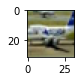

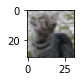

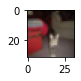

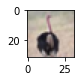

In [10]:

for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()
    

PREPROCESSING THE DATA 

In [11]:


X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255
n_classes = 10


print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL 

In [12]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten



model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000001A8E8941700>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000001A8E894

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <bound method Reduce.result of <keras.metrics.Mean object at 0x000001A8E0CEE970>>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <bound method Reduce.result of <keras.metrics.Mean object at 0x000001A8E0CEE970>>. Note t

Epoch 9/10
391/391 [==============================] - 173s 442ms/step - loss: 0.5068 - accuracy: 0.8214 - val_loss: 0.6694 - val_accuracy: 0.7717
Epoch 10/10
391/391 [==============================] - 181s 463ms/step - loss: 0.4718 - accuracy: 0.8323 - val_loss: 0.6677 - val_accuracy: 0.7776


PREDICTING 

In [13]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001A8E9A5AE50>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001A8E9A5AE5

In [14]:
print (predictions)

[[6.1783600e-03 9.8386452e-05 1.9211078e-02 2.3022681e-02 4.0990451e-01
  3.2938138e-02 5.9084222e-04 5.0545084e-01 1.8819865e-03 7.2314538e-04]
 [1.3412335e-03 5.0227472e-04 1.1366683e-01 2.4585068e-01 2.5787799e-02
  4.6864575e-01 9.3549460e-02 4.4813447e-02 2.8953245e-03 2.9470958e-03]
 [2.2309821e-05 1.9624275e-05 5.0510271e-03 3.3901760e-03 2.3049028e-05
  2.5209524e-03 9.8831195e-01 1.9975533e-04 1.2816604e-04 3.3298382e-04]
 [1.2001489e-04 2.4357589e-05 2.2340815e-03 8.7921417e-01 2.0004043e-02
  2.9777104e-02 6.6874489e-02 9.7867532e-04 3.0732559e-04 4.6570229e-04]
 [1.2679317e-06 9.9381590e-01 2.7283642e-10 6.7952483e-10 4.1000273e-10
  6.8046124e-10 6.1042038e-09 2.1811826e-10 8.4330177e-06 6.1743516e-03]
 [1.8243915e-06 9.9681491e-01 2.6732476e-08 4.9322288e-09 2.8058575e-10
  1.7884460e-08 1.6056889e-07 9.0899038e-10 1.0189794e-03 2.1640582e-03]
 [8.7646328e-02 1.3321892e-03 1.4765878e-01 4.4041201e-01 1.3769926e-03
  6.5368779e-02 1.9139440e-01 6.3055038e-04 6.3454121e-02 

In [15]:
for image in predictions:
    print(np.sum(image))

0.99999994
0.9999999
0.99999994
0.99999994
0.9999999
1.0
1.0
1.0000001
1.0


In [16]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[7 5 6 3 1 1 3 6 8]


FINAL OBJECT DETECTION 

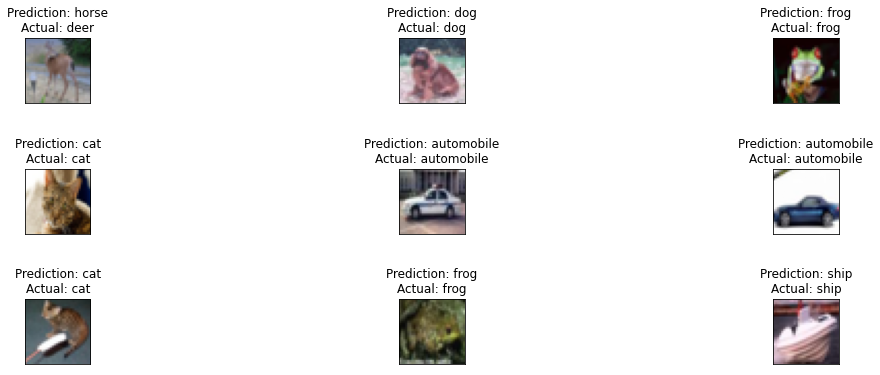

In [17]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()